# Gym Mini-Grid
[code](https://github.com/maximecb/gym-minigrid)  

In [1]:
import gym
import gym_minigrid
from PIL import Image
from gym_minigrid.wrappers import *

## Spaces

In [2]:
env =  gym.make('MiniGrid-Empty-8x8-v0')

### Action space

Actions in the basic environment:  

- Turn left  
- Turn right  
- Move forward  
- Pick up an object  
- Drop the object being carried  
- Toggle (open doors, interact with objects)  
- Done (task completed, optional)  

In [3]:
env.action_space

Discrete(7)

### Observation Space
Default, the observation is not based on Image.  
Each tile is encoded as a 3 dimensional tuple: (OBJECT_IDX, COLOR_IDX, STATE)

They use the image as its return's key is very confusing. 

In [4]:
env.observation_space

Dict(image:Box(0, 255, (7, 7, 3), uint8))

RGBImgPartialObsWrapper provides a image observation. 

In [5]:
env = RGBImgPartialObsWrapper(env)
env.observation_space

Dict(image:Box(0, 255, (56, 56, 3), uint8))

## Render

In [6]:
env =  gym.make('MiniGrid-Empty-8x8-v0')
env = RGBImgPartialObsWrapper(env, tile_size=20)
env = ImgObsWrapper(env)

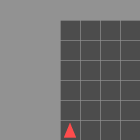

In [7]:
obs = env.reset()
Image.fromarray(obs)

In [8]:
%%capture
image = env.render()

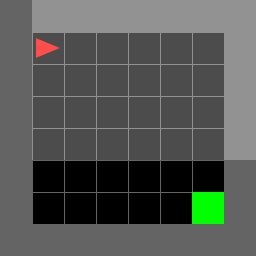

In [9]:
Image.fromarray(image)

## Flat Observation

In [10]:
env =  gym.make('MiniGrid-Empty-8x8-v0')
flat_env = FlatObsWrapper(env)

In [11]:
obs = flat_env.reset()
len(obs)

2739

## Full Observation 

In [12]:
full_obs_env =  gym.make('MiniGrid-Empty-8x8-v0')
full_obs_env = FullyObsWrapper(full_obs_env)
full_obs_env = RGBImgObsWrapper(full_obs_env)
full_obs_env = ImgObsWrapper(full_obs_env)

In [13]:
%%capture
image = full_obs_env.render()

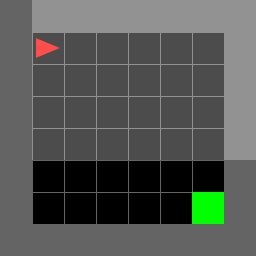

In [14]:
Image.fromarray(image)

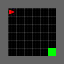

In [15]:
obs = full_obs_env.reset()
Image.fromarray(obs)

## Lava crossing environment (Safety Critical)

The agent has to reach the green goal square on the other corner of the room while avoiding rivers of deadly lava which terminate the episode in failure. Each lava stream runs across the room either horizontally or vertically, and has a single crossing point which can be safely used; Luckily, a path to the goal is guaranteed to exist. This environment is useful for studying safety and safe exploration.

In [16]:
env = gym.make("MiniGrid-LavaCrossingS9N1-v0")

In [17]:
_ = env.reset()

In [18]:
%%capture
image = env.render()

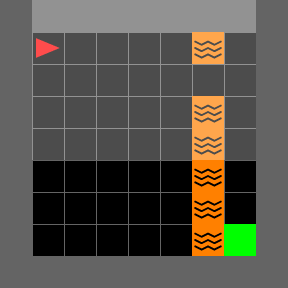

In [19]:
Image.fromarray(image)